In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "/home/zkip/airflow/transactions.db"
conn = sqlite3.connect(DB_PATH)



In [3]:
transactions = pd.read_sql("SELECT * FROM Transactions", conn)
details = pd.read_sql("SELECT * FROM TransactionDetails", conn)

transactions.head(), details.head()


(   TransactionID  StoreID  CustomerID      TransactionDate  TotalAmount
 0              1        8          62  2021-05-04 00:00:00       2544.0
 1              2        2          11  2021-05-04 00:00:00        799.0
 2              3        1          66  2021-05-04 00:00:00       3295.0
 3              4        6          23  2021-05-05 00:00:00       1598.0
 4              5        8          75  2021-05-05 00:00:00       3195.0,
    TransactionDetailID  TransactionID  ProductID  CampaignID  Quantity  \
 0                    1              1         14         NaN         1   
 1                    2              1         23         NaN         3   
 2                    3              1         37         NaN         1   
 3                    4              1          8         NaN         1   
 4                    5              2          2         NaN         1   
 
    PriceAtPurchase  TotalPrice  
 0            899.0       899.0  
 1            249.0       747.0  
 2     

In [4]:
transactions.sort_values('TotalAmount', ascending=False).head(10)

,TransactionID,StoreID,CustomerID,TransactionDate,TotalAmount
1042,1043,3,39,2026-01-08 09:00:01,18541.0
407,408,9,84,2022-05-14 00:00:00,8995.0
316,317,7,23,2022-02-20 00:00:00,8794.0
374,375,4,54,2022-04-15 00:00:00,8695.0
590,591,2,95,2022-10-24 00:00:00,8695.0
64,65,1,42,2021-07-07 00:00:00,7826.4
978,979,3,42,2023-12-09 00:00:00,7695.2
641,642,6,34,2022-11-30 00:00:00,7646.0
35,36,9,24,2021-06-11 00:00:00,7645.5
597,598,7,23,2022-10-28 00:00:00,7545.0


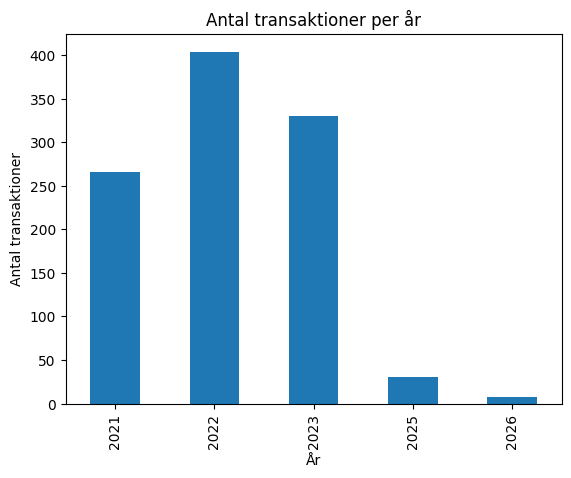

In [20]:
transactions["TransactionDate"] = pd.to_datetime(
    transactions["TransactionDate"],
    format="mixed"
)

transactions["Year"] = transactions["TransactionDate"].dt.year

transactions_per_year = (
    transactions
    .groupby("Year")
    .size()
)

transactions_per_year.plot(
    kind="bar",
    title="Antal transaktioner per år"
)

plt.xlabel("År")
plt.ylabel("Antal transaktioner")
plt.show()


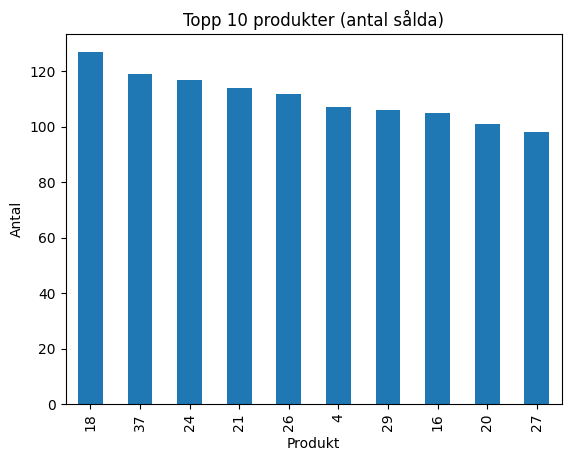

In [5]:
top_products = (
    details
    .groupby("ProductID")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(
    kind="bar",
    title="Topp 10 produkter (antal sålda)"
)

plt.xlabel("Produkt")
plt.ylabel("Antal")
plt.show()


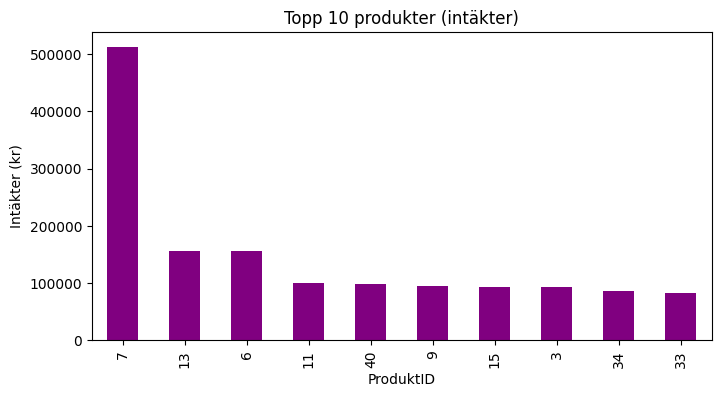

In [6]:
revenue_per_product = (
    details
    .assign(Revenue=lambda df: df["Quantity"] * df["PriceAtPurchase"])
    .groupby("ProductID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
 
revenue_per_product.plot(
    kind="bar",
    title="Topp 10 produkter (intäkter)",
    color="purple",
    figsize=(8,4)
)
 
plt.xlabel("ProduktID")
plt.ylabel("Intäkter (kr)")
plt.show()

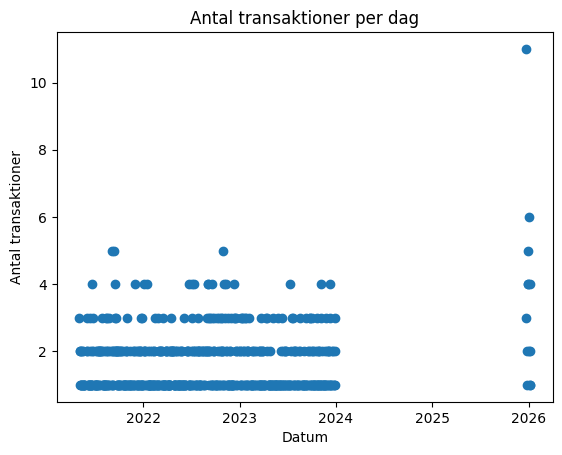

In [7]:
transactions["TransactionDate"] = pd.to_datetime(
    transactions["TransactionDate"],
    format="mixed"
)

transactions_per_day = (
    transactions
    .groupby(transactions["TransactionDate"].dt.date)
    .size()
    .reset_index(name="Count")
)

plt.scatter(
    transactions_per_day["TransactionDate"],
    transactions_per_day["Count"]
)

plt.title("Antal transaktioner per dag")
plt.xlabel("Datum")
plt.ylabel("Antal transaktioner")
plt.show()
